# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth  = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
btc_data = response_data_btc.json()
import json
print(json.dumps(btc_data, indent= 4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19022487,
            "total_supply": 19022487,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 40607.0,
                    "volume_24h": 31429266373,
                    "market_cap": 772441827377,
                    "percentage_change_1h": 0.156234068145199,
                    "percentage_change_24h": 3.68149292462705,
                    "percentage_change_7d": -0.55512490604322,
                    "percent_change_1h": 0.156234068145199,
                    "percent_change_24h": 3.68149292462705,
                    "percent_change_7d": -0.55512490604322
                },
                "CAD": {
                    "price": 51530.283,
                    "volume_24h": 39883739027.337,
                    "ma

In [7]:
# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_data_eth
response_content_eth = response_data_eth.content
response_content_eth
eth_data = response_data_eth.json()
import json
print(json.dumps(eth_data, indent= 4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120531364,
            "total_supply": 120531364,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3010.7,
                    "volume_24h": 20645866356,
                    "market_cap": 362714845476,
                    "percentage_change_1h": 0.350082971046761,
                    "percentage_change_24h": 5.08009204775186,
                    "percentage_change_7d": -1.6719115345912,
                    "percent_change_1h": 0.350082971046761,
                    "percent_change_24h": 5.08009204775186,
                    "percent_change_7d": -1.6719115345912
                },
                "CAD": {
                    "price": 3820.5783,
                    "volume_24h": 26199604405.764,
                    "ma

In [8]:
# Compute current value of my crpto
btc_value = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_value
eth_value = eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_value
# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48728.40
The current value of your 5.3 ETH is $15956.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [11]:
# Format current date as ISO format
today = pd.Timestamp('2022-4-19' , tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = today, 
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']== 'AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']== 'SPY'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
df_ticker

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-04-19 04:00:00+00:00  103.26  103.4264  102.974  103.02  7845969   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-04-19 04:00:00+00:00       32656  103.193615  437.87  445.8  437.68   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-19 04:00:00+00:00  445.04  77678099      597840  443.072191

In [12]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.02
Current SPY closing price: $445.04


In [13]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22252.00
The current value of your 200 AGG shares is $20604.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_total = my_btc_value + my_eth_value
shares_total = my_agg_value + my_spy_value

# Create savings DataFrame
data = {'amount':[crypto_total, shares_total]}
df_savings = pd.DataFrame(data, index= ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,64685.11
shares,42856.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

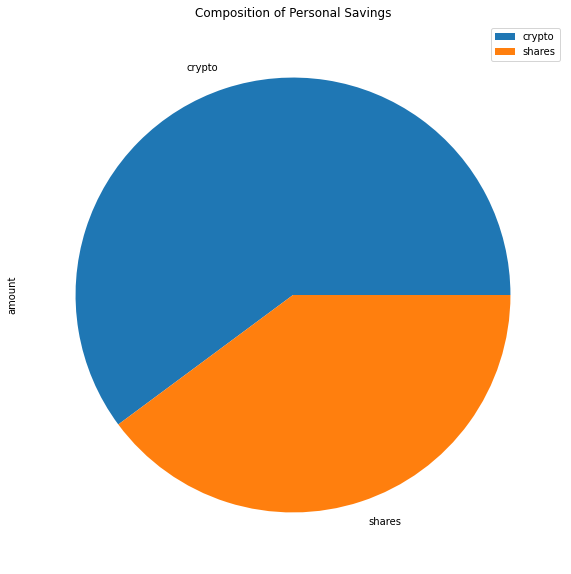

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y= 'amount', title = 'Composition of Personal Savings',figsize = (10,10))

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = crypto_total + shares_total

# Validate saving health
if savings_total > emergency_fund:
    print("Congratulations ! You have enough money in your emergency fund.")
elif savings_total == emergency_fund:
    print('Congratulations ! You have reached your financial goal')
else:
    print(f"You are ${emergency_fund - savings_total} away from raching your financial goal ")

Congratulations ! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
df_stocks = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date
).df

# Reorganize the DataFrame
AGG5 = df_stocks[df_stocks['symbol']== 'AGG'].drop('symbol', axis=1)
SPY5 = df_stocks[df_stocks['symbol']== 'SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG5, SPY5], axis = 1, keys = ['AGG', 'SPY'])
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-20  109.31  109.4000  109.20  109.31  1867805        7319  109.301387   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   
2017-04-24  109.05  109.2200  109.00  109.18  2745689       10549  109.150827   
2017-04-25  108.99  109.0450  108.77  108.82  1888469       10064  108.912429   
2017-04-26  108.85  108.9700  108.77  108.96  2893801       10145  108.884769   

               SPY                                                    \
              open     high       low   close     volume trade_count   
2017-04-20  234.14  235.845  233.7800  235.34   92572186      279885   
2017-04-21  235.22  235.310  234.1300  234.59  110389847      258915   
2017-04-24  237.17  237.410  234.5628  237.17  119209877      290927   
2017-04-25  237.93  238.950  237.8100  238.55   76698265      240232   
2017-04-26  238.53  239.530  238.3500  238.40   84702455      260064   

                        
                  vwap  
2017-04-20  234.978432  
2017-04-21  234.784238  
2017-04-24  236.615988  
2017-04-25  238.459191  
2017-04-26  238.801347

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [20]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-20  109.31  109.4000  109.20  109.31  1867805        7319  109.301387   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   
2017-04-24  109.05  109.2200  109.00  109.18  2745689       10549  109.150827   
2017-04-25  108.99  109.0450  108.77  108.82  1888469       10064  108.912429   
2017-04-26  108.85  108.9700  108.77  108.96  2893801       10145  108.884769   

                            SPY                                        \
           daily_return    open     high       low   close     volume   
2017-04-20          NaN  234.14  235.845  233.7800  235.34   92572186   
2017-04-21     0.000274  235.22  235.310  234.1300  234.59  110389847   
2017-04-24    -0.001463  237.17  237.410  234.5628  237.17  119209877   
2017-04-25    -0.003297  237.93  238.950  237.8100  238.55   76698265   
2017-04-26     0.001287  238.53  239.530  238.3500  238.40   84702455   

                                                 
           trade_count        vwap daily_return  
2017-04-20      279885  234.978432          NaN  
2017-04-21      258915  234.784238    -0.003187  
2017-04-24      290927  236.615988     0.010998  
2017-04-25      240232  238.459191     0.005819  
2017-04-26      260064  238.801347    -0.000629

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 110.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 120.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 130.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 140.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 150.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 160.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 170.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 180.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 190.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 200.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 210.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 220.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 230.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 240.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 250.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 260.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 270.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 280.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 290.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 300.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 310.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 320.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 330.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 340.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 350.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 360.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 370.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 380.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 390.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 400.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 410.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 420.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 430.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 440.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 450.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 460.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 470.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 480.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 490.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013186,0.986802,0.996355,1.012063,0.987897,1.008239,1.002088,1.008123,1.000897,1.001697,...,0.986800,0.992733,1.006333,0.999281,1.005241,0.992121,0.990767,0.983807,0.996433,0.989341
2,1.011195,0.990057,1.000039,1.014509,0.984623,1.000371,1.001710,1.011791,0.994792,1.004078,...,0.981717,0.987288,1.003985,1.012484,1.001095,0.997942,0.983613,0.976865,1.002034,0.992130
3,1.005247,0.982818,0.997732,1.018915,0.988986,0.992826,1.007417,1.015379,1.004830,1.000852,...,0.992558,0.987438,0.999112,1.009599,1.004617,0.996550,0.985808,0.967175,1.007324,1.001680
4,0.996981,0.974589,1.016606,1.015339,0.986923,1.007819,1.011778,1.014656,1.004737,0.998706,...,1.000294,1.004757,1.001575,1.013091,1.011012,0.999544,0.987777,0.963110,1.011257,0.997694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.797943,16.800966,6.785445,32.585407,18.105358,9.453292,3.551099,4.039791,7.160550,4.995119,...,8.556049,7.157156,16.838402,16.137924,28.167053,19.973383,5.647064,3.279594,7.341809,34.537376
7557,12.010619,16.894757,6.816656,32.449456,18.543406,9.424584,3.542352,3.966616,7.142088,4.932512,...,8.456959,7.238223,16.921000,16.321168,28.135928,19.963186,5.681915,3.312547,7.383535,34.119610
7558,12.042479,16.997862,6.783651,32.114373,18.740312,9.463456,3.525588,3.999813,7.165911,4.925087,...,8.416660,7.261951,16.978747,16.253243,28.107879,20.024363,5.733054,3.328053,7.348316,34.482600
7559,12.057035,16.982450,6.764136,31.885462,18.516993,9.427188,3.532950,4.034183,7.200731,4.973097,...,8.453620,7.251514,17.202315,16.371681,28.165842,19.966233,5.713863,3.323669,7.385683,34.218884


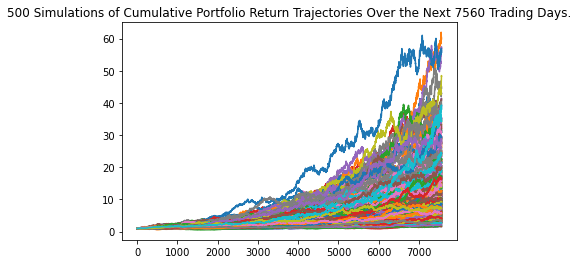

In [22]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

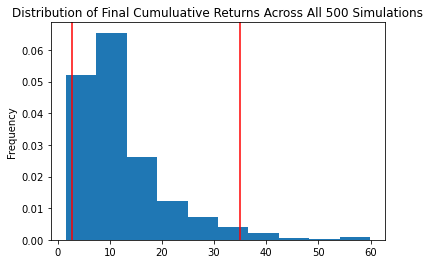

In [23]:
# Plot probability distribution and confidence intervals
bar_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
    "median": list(MC_even_dist.simulated_return.median(axis=1)),
    "min": list(MC_even_dist.simulated_return.min(axis=1)),
    "max": list(MC_even_dist.simulated_return.max(axis=1))
}

df_simulated_returns = pd.DataFrame(simulated_returns_data)
even_tbl = MC_even_dist.summarize_cumulative_return()




/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [25]:
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001070,1.001212,0.978328,1.023445
2,1.001185,1.000898,0.972000,1.034762
3,1.002173,1.001287,0.954775,1.042777
4,1.002796,1.002783,0.958151,1.050092


In [26]:
# Print summary statistics

even_tbl

count           500.000000
mean             12.352591
std               8.814262
min               1.549418
25%               6.722246
50%               9.906219
75%              15.206868
max              59.922137
95% CI Lower      2.796319
95% CI Upper     34.909806
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8] * initial_investment,2)
ci_upper = round(even_tbl[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55926.39 and $698196.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(even_tbl[8] * initial_investment2,2)
ci_upper2 = round(even_tbl[9] * initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83889.58 and $1047294.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist5 = MCSimulation(portfolio_data= df_stock_data, weights= [.40,.60], num_simulation= 500, num_trading_days= 252*5)
MC_even_dist5.portfolio_data.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-20  109.31  109.4000  109.20  109.31  1867805        7319  109.301387   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   
2017-04-24  109.05  109.2200  109.00  109.18  2745689       10549  109.150827   
2017-04-25  108.99  109.0450  108.77  108.82  1888469       10064  108.912429   
2017-04-26  108.85  108.9700  108.77  108.96  2893801       10145  108.884769   

                            SPY                                        \
           daily_return    open     high       low   close     volume   
2017-04-20          NaN  234.14  235.845  233.7800  235.34   92572186   
2017-04-21     0.000274  235.22  235.310  234.1300  234.59  110389847   
2017-04-24    -0.001463  237.17  237.410  234.5628  237.17  119209877   
2017-04-25    -0.003297  237.93  238.950  237.8100  238.55   76698265   
2017-04-26     0.001287  238.53  239.530  238.3500  238.40   84702455   

                                                 
           trade_count        vwap daily_return  
2017-04-20      279885  234.978432          NaN  
2017-04-21      258915  234.784238    -0.003187  
2017-04-24      290927  236.615988     0.010998  
2017-04-25      240232  238.459191     0.005819  
2017-04-26      260064  238.801347    -0.000629

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 110.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 120.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 130.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 140.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 150.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 160.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 170.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 180.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 190.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 200.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 210.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 220.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 230.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 240.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 250.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 260.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 270.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 280.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 290.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 300.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 310.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 320.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 330.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 340.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 350.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 360.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 370.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 380.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 390.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 400.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 410.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 420.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 430.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 440.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 450.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 460.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 470.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 480.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 490.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990836,1.007725,0.995625,1.001787,0.993947,0.997297,1.015775,1.002969,0.995649,0.993717,...,0.998812,1.009200,1.000139,0.996072,0.994689,1.003609,0.998913,1.000558,1.006460,1.001684
2,0.991492,1.015057,1.004114,1.007232,0.988359,0.988386,1.031389,0.997434,0.997241,0.988167,...,1.009188,1.005250,1.002480,0.990680,0.981807,0.994176,0.987419,1.001529,1.005053,1.008619
3,1.000420,1.021239,0.996565,1.002048,0.978971,1.000885,1.029959,0.992283,0.998300,0.989174,...,1.008339,0.996640,1.010167,0.985859,0.991872,1.001257,1.006618,1.007449,1.007043,1.000661
4,1.001735,1.021288,0.997176,1.011536,0.986436,1.012699,1.029324,0.992876,1.009608,0.978502,...,1.012540,0.997458,1.001091,0.976757,0.993060,1.004637,1.009386,1.007093,1.008399,1.016048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.047073,1.733768,0.932332,1.852880,1.757228,1.741421,1.753846,1.065742,1.732513,1.577937,...,2.146740,1.764911,1.994916,0.864086,1.037465,1.500069,1.112497,2.151543,2.199175,1.809604
1257,2.049373,1.713879,0.938948,1.855995,1.751450,1.737013,1.746848,1.078614,1.751586,1.553000,...,2.144561,1.743025,2.004432,0.872733,1.044591,1.491391,1.103097,2.133743,2.203183,1.797464
1258,2.071487,1.709522,0.938426,1.882546,1.747007,1.754266,1.749486,1.085267,1.753048,1.579399,...,2.150431,1.724947,1.978800,0.871022,1.052460,1.488428,1.095247,2.123616,2.214818,1.794088
1259,2.083105,1.722205,0.941321,1.890030,1.757439,1.774333,1.758497,1.087923,1.742431,1.577855,...,2.158850,1.721928,1.969704,0.867047,1.061006,1.493597,1.106402,2.147171,2.224599,1.781630


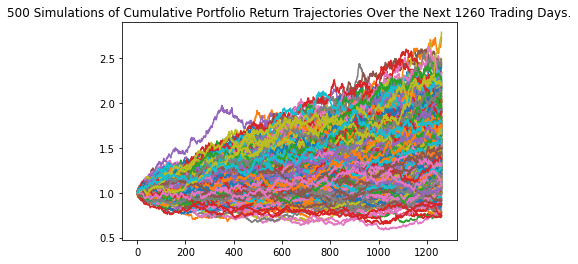

In [36]:
# Plot simulation outcomes
line_plot = MC_even_dist5.plot_simulation()

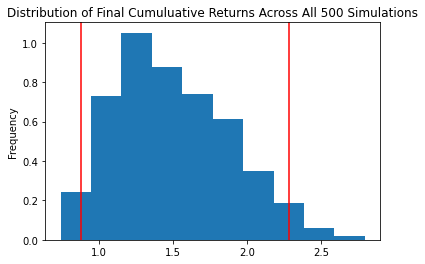

In [37]:
# Plot probability distribution and confidence intervals
bar_plot = MC_even_dist5.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl5 = MC_even_dist5.summarize_cumulative_return()

# Print summary statistics
even_tbl5

/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.497666
std               0.386349
min               0.738426
25%               1.192467
50%               1.447135
75%               1.769025
max               2.792885
95% CI Lower      0.874225
95% CI Upper      2.280831
Name: 1260, dtype: float64

In [52]:
# Set initial investment
initial_investment5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower5 = round(even_tbl5[8] * initial_investment5,2)
ci_upper5 = round(even_tbl5[9] * initial_investment5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower5} and ${ci_upper5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52453.51 and $136849.85


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist10 = MCSimulation(portfolio_data= df_stock_data, weights= [.40,.60], num_simulation= 500, num_trading_days= 252*10)
MC_even_dist10.portfolio_data.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-20  109.31  109.4000  109.20  109.31  1867805        7319  109.301387   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   
2017-04-24  109.05  109.2200  109.00  109.18  2745689       10549  109.150827   
2017-04-25  108.99  109.0450  108.77  108.82  1888469       10064  108.912429   
2017-04-26  108.85  108.9700  108.77  108.96  2893801       10145  108.884769   

                            SPY                                        \
           daily_return    open     high       low   close     volume   
2017-04-20          NaN  234.14  235.845  233.7800  235.34   92572186   
2017-04-21     0.000274  235.22  235.310  234.1300  234.59  110389847   
2017-04-24    -0.001463  237.17  237.410  234.5628  237.17  119209877   
2017-04-25    -0.003297  237.93  238.950  237.8100  238.55   76698265   
2017-04-26     0.001287  238.53  239.530  238.3500  238.40   84702455   

                                                 
           trade_count        vwap daily_return  
2017-04-20      279885  234.978432          NaN  
2017-04-21      258915  234.784238    -0.003187  
2017-04-24      290927  236.615988     0.010998  
2017-04-25      240232  238.459191     0.005819  
2017-04-26      260064  238.801347    -0.000629

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 110.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 120.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 130.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 140.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 150.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 160.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 170.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 180.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 190.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 200.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 210.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 220.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 230.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 240.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 250.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 260.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 270.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 280.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 290.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 300.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 310.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 320.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 330.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 340.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 350.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 360.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 370.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 380.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 390.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 400.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 410.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 420.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 430.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 440.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 450.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 460.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 470.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 480.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

Running Monte Carlo simulation number 490.


/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/surajshrestha

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986173,1.015964,1.003381,1.001429,1.005778,0.989275,1.005260,1.000524,0.991487,1.010865,...,0.982067,0.995597,1.000658,1.015415,0.993931,0.997568,0.986864,0.998751,1.012998,1.003562
2,0.991184,1.025747,0.998097,1.004481,1.012364,0.979610,1.001273,0.989147,0.983418,1.011459,...,0.986855,0.992161,1.004399,1.022769,0.988181,0.980142,0.996479,0.993690,1.013893,1.014399
3,0.984730,1.014833,0.986501,1.000880,1.013097,0.967811,1.004682,0.988960,0.980737,1.003382,...,0.987437,0.990575,0.997809,1.028566,0.984373,0.980599,0.994616,0.996462,1.024816,1.028808
4,0.992589,1.020293,0.987605,0.968088,1.023196,0.964445,1.001776,0.994128,0.972878,1.009138,...,0.985862,0.971610,0.999947,1.021465,0.973087,0.971682,0.988064,1.000200,1.029653,1.037547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.223206,4.413592,4.337297,2.268083,3.471491,2.869543,2.102243,1.606025,1.132614,2.805097,...,2.287155,1.146656,3.524711,0.890451,1.917604,1.986976,1.613683,2.833472,1.427042,2.712432
2517,2.231527,4.401621,4.375875,2.273398,3.406263,2.863672,2.123066,1.588189,1.146196,2.791089,...,2.279382,1.159410,3.556929,0.884506,1.932934,1.966886,1.612848,2.833464,1.441556,2.688951
2518,2.247380,4.438432,4.335819,2.279512,3.378764,2.881910,2.125057,1.585146,1.133487,2.802751,...,2.268866,1.163348,3.521980,0.886218,1.938478,1.965263,1.583729,2.863663,1.432750,2.691900
2519,2.258152,4.483332,4.299949,2.271426,3.345674,2.899431,2.111084,1.586695,1.137564,2.786040,...,2.285846,1.166541,3.501388,0.900479,1.959483,1.972659,1.572374,2.845238,1.439010,2.678674


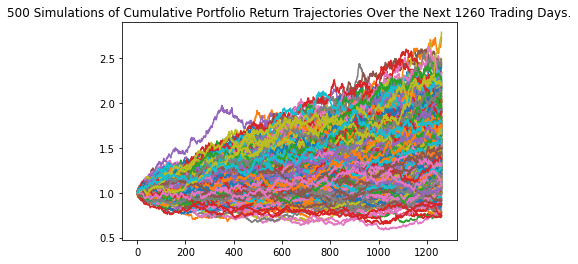

In [47]:
# Plot simulation outcomes
line_plot = MC_even_dist5.plot_simulation()

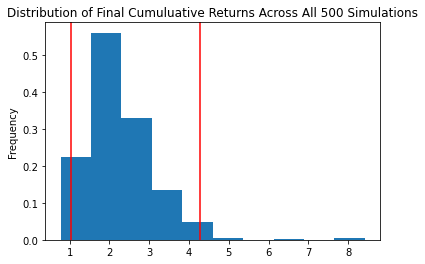

In [49]:
# Plot probability distribution and confidence intervals
bar_plot = MC_even_dist10.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl10 = MC_even_dist10.summarize_cumulative_return()

# Print summary statistics
even_tbl10

/Users/surajshrestha/Dropbox/My Mac (Surajs-MacBook-Air.local)/Desktop/Homeworks/API-Homework/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.262785
std               0.872665
min               0.772022
25%               1.686956
50%               2.112778
75%               2.662892
max               8.418368
95% CI Lower      1.028859
95% CI Upper      4.275715
Name: 2520, dtype: float64

In [55]:
# Set initial investment
initial_investment10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower10 = round(even_tbl10[8] * initial_investment10,2)
ci_upper10 = round(even_tbl10[9] * initial_investment10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower10} and ${ci_upper10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61731.51 and $256542.92
